In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import data_pre_proces
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [2]:
data_black_fraiday = pd.read_csv("BlackFriday.csv", header=None,sep=',')
data_black_fraiday.columns = [i for i in  data_black_fraiday.loc[[0]].values[0]]
data_black_fraiday = data_black_fraiday.drop([0])
data_black_fraiday.index = range(data_black_fraiday.shape[0])
data_reserv_data_black_fraiday = copy.deepcopy(data_black_fraiday)

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dct_for_age = {'0-17': 0, '18-25': 1 ,'26-35': 2, '36-45' : 3, '46-50' : 4, '51-55' : 5, '55+' : 6}
def modification_of_data(data,name_of_col,dct):
    for i in dct.keys():
        data.loc[data[name_of_col] == i, name_of_col] = dct[i]
    return data
data = data_pre_proces.elements_col_to_int(data_black_fraiday,'Gender')
data = modification_of_data(data,'Age',dct_for_age)
data.loc[data['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = '4'
data.Gender = pd.to_numeric(data.Gender)
data.Occupation = pd.to_numeric(data.Occupation)
data = data_pre_proces.elements_col_to_int(data_black_fraiday,'City_Category')
data.Purchase = pd.to_numeric(data.Purchase)
data.Stay_In_Current_City_Years = pd.to_numeric(data.Stay_In_Current_City_Years)
data.Marital_Status = pd.to_numeric(data.Marital_Status)
data.Product_Category_1 = pd.to_numeric(data.Product_Category_1)
data.Product_Category_2 = pd.to_numeric(data.Product_Category_2)
data.Product_Category_3 = pd.to_numeric(data.Product_Category_3)
data['Product_ID'] = data['Product_ID'].str.replace('P00', '')
data.Product_ID = pd.to_numeric(data.Product_ID)

Purchase                      1.000000
Gender                        0.060086
Occupation                    0.021104
City_Category                 0.010854
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_ID                   -0.079774
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64 

Purchase                      1.000000
Gender                        0.060086
Occupation                    0.021104
City_Category                 0.010854
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_ID                   -0.079774
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64
Index(['Purchase', 'Gender', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_3',
       'Product_ID'

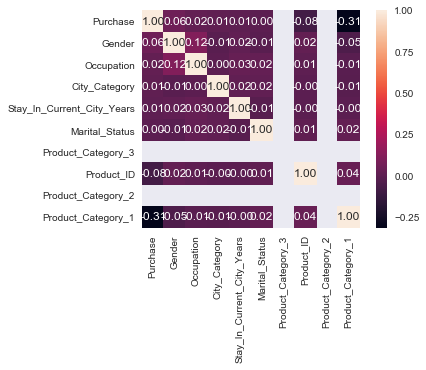

In [4]:
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, "Purchase").index
print(columns)

correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [5]:
#Looking for missing values
data['Product_Category_3']= \
data['Product_Category_3'].fillna(-2.0).astype('float')
data.Product_Category_3.value_counts().sort_index()
print(data['Product_Category_3'])
#################################################!
#################################################!
#################################################!
data['Product_Category_2']= \
data['Product_Category_2'].fillna(-2.0).astype('float')
data.Product_Category_3.value_counts().sort_index()
print(data['Product_Category_2'])
#################################################!
#################################################!
#################################################!
#Stay_In_Current_City_Years to binary
le = LabelEncoder()
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

0         -2.0
1         14.0
2         -2.0
3         -2.0
4         -2.0
5         -2.0
6         17.0
7         -2.0
8         -2.0
9         -2.0
10        -2.0
11        -2.0
12        -2.0
13         5.0
14        14.0
15        -2.0
16         4.0
17        -2.0
18        16.0
19        15.0
20        -2.0
21        -2.0
22        -2.0
23        -2.0
24        14.0
25        -2.0
26        -2.0
27        -2.0
28        14.0
29         8.0
          ... 
537547    15.0
537548    -2.0
537549    14.0
537550    -2.0
537551     8.0
537552    -2.0
537553    -2.0
537554    -2.0
537555    -2.0
537556    -2.0
537557    -2.0
537558    -2.0
537559    -2.0
537560    -2.0
537561    -2.0
537562    14.0
537563    -2.0
537564    -2.0
537565    -2.0
537566    -2.0
537567    -2.0
537568    -2.0
537569    -2.0
537570    -2.0
537571     5.0
537572    -2.0
537573    16.0
537574    -2.0
537575    -2.0
537576    -2.0
Name: Product_Category_3, Length: 537577, dtype: float64
0         -2.0
1          6.

In [6]:
#Split data for train and test
target = 'Purchase'
train_df, test_df, Y_train, Y_test =  train_test_split (data, data[target], test_size = 0.20, random_state=42)
predictors = train_df.columns.drop([target,'Product_ID','User_ID'])

In [8]:
#from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier()
#dt.fit(predictors, train_df[target])
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(train_df[predictors], train_df[target])
print("R-Squared on train dataset={}".format(DT.score(test_df[predictors],test_df[target])))
y_true = np.array(test_df[target])
y_pred = DT.predict(test_df[predictors])


#print(accuracy_score(y_true, np.round(y_pred)))

R-Squared on train dataset=0.6480861624021056


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10],
              "max_depth": [2],
              "min_samples_leaf": [20],
              "max_leaf_nodes": [5],
              }
grid_cv_dtm = GridSearchCV(DT, param_grid,n_jobs=-1, cv=5)
grid_cv_dtm.fit(train_df[predictors], train_df[target])
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))


In [ ]:
# Evaluating training model
predicted = grid_cv_dtm.best_estimator_.predict(X)
residuals = y.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()